In [2]:
import pandas as pd
import seaborn as sb

import warnings
warnings.filterwarnings("ignore")

from scipy import stats
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score 


from sklearn.preprocessing import StandardScaler

In [3]:
df=pd.read_csv(r"C:\Users\akshita\Downloads\DelhiAQI.csv")
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
0,Delhi,01-01-2018,303.41,415.09,62.76,63.92,11.79,73.16,1.80,18.58,68.75,462
1,Delhi,01-02-2018,277.48,422.59,31.26,53.73,4.26,55.61,1.52,12.43,68.68,439
2,Delhi,01-03-2018,217.01,336.87,37.98,52.24,2.87,50.81,1.29,10.28,54.94,405
3,Delhi,01-04-2018,248.54,377.61,35.56,61.57,4.24,55.17,1.36,14.42,66.31,394
4,Delhi,01-05-2018,240.42,360.99,38.73,54.80,4.57,51.36,1.38,13.20,48.57,398


In [4]:
df= df.drop(['City','Date'], axis=1)
df.info()

df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913 entries, 0 to 912
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PM2.5   913 non-null    float64
 1   PM10    913 non-null    float64
 2   NO      913 non-null    float64
 3   NO2     913 non-null    float64
 4   NOx     913 non-null    float64
 5   NH3     913 non-null    float64
 6   CO      913 non-null    float64
 7   SO2     913 non-null    float64
 8   O3      913 non-null    float64
 9   AQI     913 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 71.5 KB


PM2.5    0
PM10     0
NO       0
NO2      0
NOx      0
NH3      0
CO       0
SO2      0
O3       0
AQI      0
dtype: int64

In [5]:
df.describe()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,913.000000,913.000000,913.00000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000,913.000000
mean,105.458171,213.439157,31.97747,43.098346,51.963604,38.338368,1.322881,13.852180,41.454918,228.813801
std,77.477643,116.910831,26.56564,15.931366,30.946864,9.813347,0.562686,4.226043,12.438408,113.960050
min,10.240000,19.510000,4.42000,14.360000,1.870000,19.900000,0.520000,6.180000,16.510000,51.000000
25%,49.960000,120.820000,13.19000,30.730000,29.360000,30.860000,0.930000,10.440000,31.560000,129.000000
50%,81.870000,193.790000,22.50000,41.230000,43.920000,36.610000,1.160000,13.250000,40.160000,208.000000
75%,137.290000,281.530000,40.92000,54.010000,66.400000,44.470000,1.520000,16.550000,50.560000,306.000000
max,582.280000,761.910000,158.63000,106.040000,195.810000,75.880000,3.660000,33.500000,76.320000,659.000000


In [6]:
#df[['PM2.5','PM10','NO', 'NO2']].quantile(0.9)

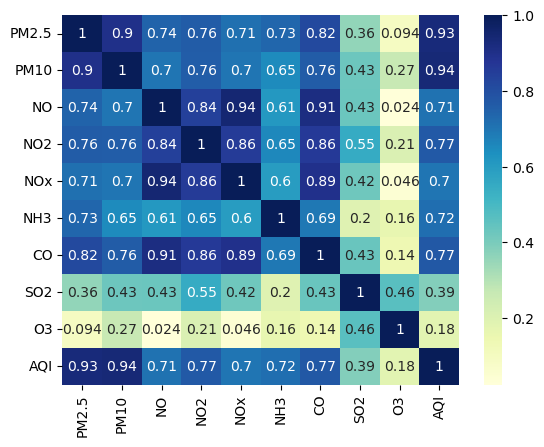

In [7]:
dataplot=sb.heatmap(df.corr(),annot=True, cmap='YlGnBu')

In [8]:
zscore1= np.abs(stats.zscore(df['PM2.5']))
print(np.where(zscore1>3))

zscore2= np.abs(stats.zscore(df['PM10']))
print(np.where(zscore2>3))

zscore3= np.abs(stats.zscore(df['NO']))
print(np.where(zscore3>3))

zscore4= np.abs(stats.zscore(df['NO2']))
print(np.where(zscore4>3))

(array([308, 311, 356, 357, 367, 381, 669, 671, 680, 681, 682, 683, 730],
      dtype=int64),)
(array([163, 164, 165, 669, 671, 683], dtype=int64),)
(array([298, 299, 330, 331, 335, 336, 337, 338, 339, 353, 356, 357, 363,
       375, 376, 384, 400, 703, 731], dtype=int64),)
(array([ 40,  51, 384, 689, 703], dtype=int64),)


In [9]:
for i in np.where((zscore1>3) | (zscore2>3) | (zscore3>3) | (zscore4>3)):
    df.drop(i, inplace=True)

In [10]:
print("New dimensions:", df.shape)
df.describe()

New dimensions: (877, 10)


,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,AQI
count,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000,877.000000
mean,97.768552,202.518563,29.394527,41.975268,49.113284,37.810034,1.267891,13.741334,41.451368,219.346636
std,66.085714,103.486409,22.297325,14.791660,26.740733,9.464780,0.483185,4.195496,12.611850,104.676086
min,10.240000,19.510000,4.420000,14.360000,1.870000,19.900000,0.520000,6.180000,16.510000,51.000000
25%,48.460000,117.660000,12.820000,30.460000,29.100000,30.720000,0.920000,10.420000,31.250000,127.000000
50%,78.400000,187.590000,21.370000,40.610000,42.630000,36.340000,1.140000,13.000000,40.180000,202.000000
75%,128.450000,270.870000,38.730000,52.700000,63.160000,43.540000,1.470000,16.390000,50.710000,294.000000
max,333.430000,516.850000,111.090000,85.560000,143.910000,75.880000,3.200000,33.500000,76.320000,532.000000


In [11]:
X= df.drop(['AQI'], axis=1)
#X= df[['PM2.5', 'PM10', 'NO', 'NO2']]
y= df[['AQI']]

x_train, x_test, y_train, y_test= train_test_split(X, y, train_size=0.75, random_state=42)

In [12]:
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
y_train_scaled=scaler.fit_transform(y_train)

#x_test_scaled
#print(scaler.fit_transform(x_train))

<h3>Linear regression</h3>

In [13]:
from sklearn.linear_model import LinearRegression

model1=LinearRegression()
model1.fit(x_train_scaled,y_train_scaled)
y_pred1=model1.predict(x_test_scaled)
y_pred1_inv=scaler.inverse_transform(y_pred1)

accuracy1=cross_val_score(model1, X, y, cv=4, scoring='neg_root_mean_squared_error')
print("Absolute value of negative RMSE using cross validation:", abs(accuracy1.mean()))
print("")
accuracy1=cross_val_score(model1, X, y, cv=4, scoring='r2')
print("R2 score using cross validation:", accuracy1.mean())
print("")
mae1 = mean_absolute_error(y_test, y_pred1_inv) 
mse1 = mean_squared_error(y_test, y_pred1_inv) 
rmse1 = np.sqrt(mse1) 
r2_1 = r2_score(y_test, y_pred1_inv) 
print("MAE:", mae1, " RMSE:", rmse1," R2 Score:", r2_1)

Absolute value of negative RMSE using cross validation: 33.75299534078218

R2 score using cross validation: 0.8779617674087669

MAE: 22.740863967333073  RMSE: 31.947221549682894  R2 Score: 0.9006762700108424


In [14]:
l1= x_train_scaled[3,:]
l2= model1.coef_.flatten().tolist()
print(l1)
print(l2)
print(sum(l2))
s1=0
for (i,j) in zip(l1, l2):
    s1=s1+(i* j)
    print(s1)
print(s1+model1.intercept_)    
pr = model1.predict(l1.reshape(1,-1))
print(scaler.inverse_transform(pr)) 


[ 0.34527286  0.65940287  1.16248476  1.51053728  1.28036329 -0.08275184
  1.15049013  3.67882297  1.43568589]
[0.49016737575255165, 0.507954209981326, -0.09702884694148, 0.042281312512283224, 0.07106827400675733, 0.04544937696160939, -0.06046625786368086, 0.0041305717248785265, -0.021206101495561295]
0.982349914638684
0.1692414894656645
0.5041879534036627
0.3913933978548799
0.45526089680990434
0.5462541057992814
0.5424930862914153
0.47292725347872666
0.4881228956129786
0.45767759498156185
[0.45767759]
[[266.11358774]]


In [15]:
mode=LinearRegression()
mode.fit(x_train, y_train)

l1= np.array(df.iloc[3, :9])
l2= mode.coef_.flatten().tolist()
print(l1)
print(l2)
print(sum(l2))
s1=0
for (i,j) in zip(l1, l2):
    s1=s1+(i* j)
    print(s1)
print(s1+mode.intercept_)    
print(mode.predict(l1.reshape(1,-1)))    

[248.54 377.61  35.56  61.57   4.24  55.17   1.36  14.42  66.31]
[0.7792560265261451, 0.5145973832447502, -0.4793080050590521, 0.3064181561718807, 0.290911845689906, 0.5007315546613937, -13.522647136872001, 0.10353630074655984, -0.1738833318333351]
-11.680387206723752
193.6762928328081
387.9934107198582
370.9492180599583
389.815383935461
391.0488501611862
418.6742100318553
400.28340992570935
401.77640338247477
390.2461996486063
[419.43163988]
[[419.43163988]]


In [23]:
 
print(mode.predict(np.array([79, 195, 29.394527 , 12, 49.113284, 37.810034 , 513, 4, 19]).reshape(1,-1)))


print(model1.predict(np.array([79, 195, 29.394527 , 12, 49.113284, 37.810034 , 513, 4, 19]).reshape(1,-1)))


[[-6726.10616427]]
[[109.23280721]]


In [55]:
print(mode.intercept_)

[29.18544024]


<h3>Ridge Regression</h3>

In [13]:
from sklearn.linear_model import Ridge

model2=Ridge()
model2.fit(x_train_scaled,y_train_scaled)
y_pred2=model2.predict(x_test_scaled)
y_pred2_inv=scaler.inverse_transform(y_pred2)

accuracy2=cross_val_score(model2, X, y, cv=4, scoring='neg_root_mean_squared_error')
print("Absolute value of negative RMSE using cross validation:", abs(accuracy2.mean()))
print("")
accuracy2=cross_val_score(model2, X, y, cv=4, scoring='r2')
print("R2 score using cross validation:", accuracy2.mean())
print("")
mae2 = mean_absolute_error(y_test, y_pred2_inv) 
mse2 = mean_squared_error(y_test, y_pred2_inv) 
rmse2 = np.sqrt(mse2) 
r2_2 = r2_score(y_test, y_pred2_inv) 
print("MAE:", mae2, " RMSE:", rmse2," R2 Score:", r2_2)

Absolute value of negative RMSE using cross validation: 30.64485747332563

R2 score using cross validation: 0.905956033613099

MAE: 22.88232415550319  RMSE: 32.27263242227014  R2 Score: 0.898642563838716


<h3>Lasso Regression</h3>

In [14]:
from sklearn.linear_model import Lasso

model3=Lasso(alpha=0.0)
model3.fit(x_train_scaled,y_train_scaled)
y_pred3=model3.predict(x_test_scaled)
y_pred3_inv=scaler.inverse_transform(y_pred3.reshape(-1, 1))

accuracy3=cross_val_score(model3, X, y, cv=4, scoring='neg_root_mean_squared_error')
print("Absolute value of negative RMSE using cross validation:", abs(accuracy3.mean()))
print("")
accuracy3=cross_val_score(model3, X, y, cv=4, scoring='r2')
print("R2 score using cross validation:", accuracy3.mean())
print("")
mae3 = mean_absolute_error(y_test, y_pred3_inv) 
mse3 = mean_squared_error(y_test, y_pred3_inv) 
rmse3 = np.sqrt(mse3) 
r2_3 = r2_score(y_test, y_pred3_inv) 
print("MAE:", mae3, " RMSE:", rmse3," R2 Score:", r2_3)

Absolute value of negative RMSE using cross validation: 30.64487160211541

R2 score using cross validation: 0.9059559138528374

MAE: 22.884294419840444  RMSE: 32.273744099601615  R2 Score: 0.8986355809125426


<h3>Random Forest</h3>

In [15]:
from sklearn.ensemble import RandomForestRegressor 
 
model4=RandomForestRegressor()
model4.fit(x_train_scaled,y_train_scaled)
y_pred4=model4.predict(x_test_scaled)
y_pred4_inv=scaler.inverse_transform(y_pred4.reshape(-1, 1))
print(model4.score(x_train_scaled,y_train_scaled))
print("")
accuracy4=cross_val_score(model4, X, y, cv=4, scoring='r2')
print("Accuracy result is:", accuracy4.mean())
print("")

mae4 = mean_absolute_error(y_test, y_pred4_inv) 
mse4 = mean_squared_error(y_test, y_pred4_inv) 
rmse4 = np.sqrt(mse1) 
r2_4 = r2_score(y_test, y_pred4_inv) 
print("MAE:", mae4, " RMSE:", rmse4," R2 Score:", r2_4)

0.9908072897000513

Accuracy result is: 0.914640663957438

MAE: 19.178545454545457  RMSE: 32.27374409960161  R2 Score: 0.9257244353991678


In [47]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [200, 400, 600, 800]
max_features = [None]
max_depth = [3,6]
min_samples_leaf = [1, 2, 4]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf}
print(random_grid)
print("")

{'n_estimators': [200, 400, 600, 800], 'max_features': [None], 'max_depth': [3, 6], 'min_samples_leaf': [1, 2, 4]}



In [60]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 4, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(x_train_scaled, y_train_scaled)

Fitting 4 folds for each of 24 candidates, totalling 96 fits


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3, 6],
                                        'max_features': [None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'n_estimators': [200, 400, 600, 800]},
                   random_state=42, verbose=2)

In [61]:
print("Best parameters:",rf_random.best_params_)
rf_random.best_score_

Best parameters: {'n_estimators': 400, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 6}


0.9364902574206773

In [53]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(x_train_scaled, y_train_scaled)

RandomForestRegressor(n_estimators=10, random_state=42)

In [57]:
def evaluate(model, x_train_scaled, y_train_scaled):
    predictions = model.predict(x_test_scaled)
    y_pred_inv=scaler.inverse_transform(predictions.reshape(-1, 1))
    accuracy = r2_score(y_test, y_pred_inv)
    print('Model Performance')
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    print("")
    return accuracy

base_accuracy = evaluate(base_model, x_train_scaled, y_train_scaled)

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, x_train_scaled, y_train_scaled)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Model Performance
Accuracy = 0.91%.

Model Performance
Accuracy = 0.93%.

Improvement of 1.31%.


# Bayesian Linear Regression

In [ ]:
from sklearn.linear_model import BayesianRidge

model5=BayesianRidge()
model5.fit(x_train_scaled,y_train)
y_pred5=model5.predict(x_test_scaled)

print(model5.score(x_train_scaled,y_train)*100)
print("")
accuracy5=cross_val_score(model5, X, y)
print("Accuracy result is:", accuracy5.mean()*100)
print("")